# Домашнее задание к теме "Корреляция и корреляционный анализ"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Расчёт для всей выборки

In [2]:
data = pd.read_csv('water.csv')
data = data[data.columns.tolist()[1:5]] # отсекаем лишний столбец с индексом
data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


<AxesSubplot:title={'center':'Связь между жёсткостью воды и смертностью населения'}, xlabel='hardness', ylabel='mortality'>

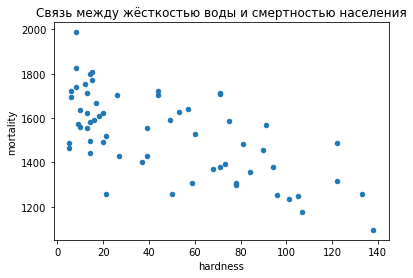

In [3]:
data.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Связь между жёсткостью воды и смертностью населения')

In [4]:
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [5]:
data[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = data[['hardness']]
y = data['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [9]:
print(model.coef_, model.intercept_)

[-2.82962875] 1631.2482854583623


In [10]:
y_pred = model.predict(X_test)
y_pred

array([1376.58169799, 1588.80385421, 1594.46311171, 1597.29274046,
       1430.34464424, 1506.74462048, 1469.95944673, 1286.03357801,
       1554.84830922, 1359.6039255 , 1608.61125546, 1393.55947049,
       1492.59647673, 1588.80385421, 1254.90766176, 1557.67793797,
       1520.89276422, 1334.13726675, 1608.61125546])

In [11]:
# коэффициент детерминации
model.score(X_test, y_test)

0.4146722961404413

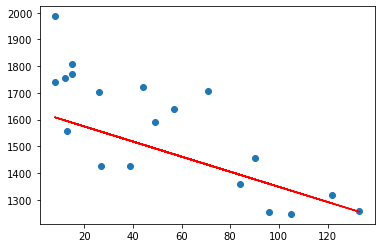

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Видно, что полученная прямая не является хорошим приближением исследуемой зависимости. Наблюдается большой разброс модулей остатков, есть даже значения, которые можно назвать выбросами. Коэффициент детерминации составляет всего 0.41, что тоже подтверждает, что полученная модель далека от идеальной. 

В целом наблюдается обратная зависимость между жёсткостью воды и смертностью населения. Зависимость можно с довольно сильной натяжкой назвать линейной - коэффициент детерминации составляет всего 0,41. Коэффициенты корреляции Спирмена и Кенделла составляют -0.63 и -0.45, соответственно. Это подтверждает обратный характер зависимости между явлениеми, но связь нельзя назвать очень тесной. 

### Расчёт для северных и южных городов по отдельности

In [13]:
data_north = data.loc[data.location == 'North']

<AxesSubplot:title={'center':'Связь между жёсткостью воды и смертностью населения в северных городах'}, xlabel='hardness', ylabel='mortality'>

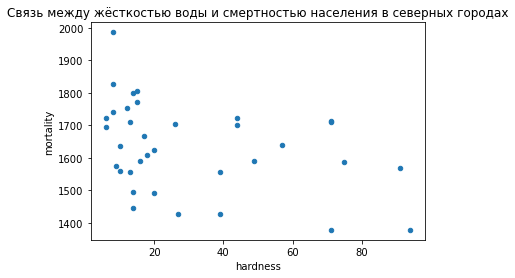

In [14]:
data_north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Связь между жёсткостью воды и смертностью населения в северных городах')

In [15]:
data_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [16]:
data_north[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [17]:
X_n = data_north[['hardness']]
y_n = data_north['mortality']
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.30, random_state=27)

In [18]:
model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train) 
y_n_pred = model_n.predict(X_n_test)
model_n.score(X_n_test, y_n_test)

0.13285479350675755

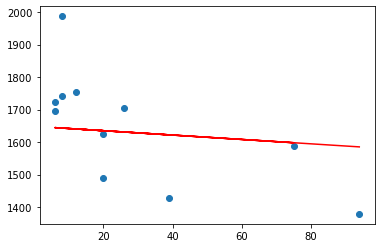

In [19]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')

In [20]:
data_south = data.loc[data.location == 'South']

<AxesSubplot:title={'center':'Связь между жёсткостью воды и смертностью населения в южных городах'}, xlabel='hardness', ylabel='mortality'>

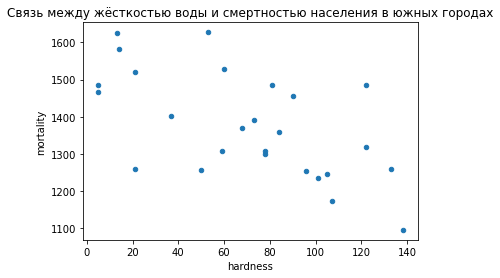

In [21]:
data_south.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Связь между жёсткостью воды и смертностью населения в южных городах')

In [22]:
data_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [23]:
data_south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [24]:
X_s = data_south[['hardness']]
y_s = data_south['mortality']
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.30, random_state=27)

In [25]:
model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train) 
y_s_pred = model_s.predict(X_s_test)
model_s.score(X_s_test, y_s_test)

0.28310460335810184

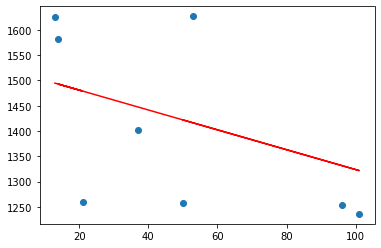

In [26]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')

При разделении городов на северные и южные обратная зависимость сохраняется, но становится ещё менее выраженной, по крайней мере для северных городов. Коэффициенты корреляции и детерминации сильно уменьшаются, и о какой-либо линейной зависимости становится сложно говорить. Для южных городов сохраняется примерно такая же теснота связи между явлениями, как и для всей выборки в целом. 